# Cell type classification with Feed-Forward Neural Network

In [3]:
# Dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

%matplotlib inline
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Mount drive
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [4]:
# Set paths
path_root = '/drive/My Drive/Deep Learning/github/'
path_raw = path_root + 'data/raw/'
path_pca = path_root + 'data/pca/'
path_scvae  = path_root + 'data/scvae/'
path_results = path_root + 'results/ffnn/'

In [5]:
# Define neural network
class Net(nn.Module):
    '''
    pyTorch neural network
    one hidden layer
    aimed for classification (softmax function in output layer)
    '''
    def __init__(self, num_input, unit_hidden, num_output, activation_function):
        super(Net, self).__init__()  

        # input layer
        self.W_1 = Parameter(init.xavier_normal_(torch.Tensor(num_hidden_units, num_input)))
        self.b_1 = Parameter(init.constant_(torch.Tensor(num_hidden_units), 0))
        self.activation = activation_function

        # hidden layer
        self.W_2 = Parameter(init.xavier_normal_(torch.Tensor(num_output, num_hidden_units)))
        self.b_2 = Parameter(init.constant_(torch.Tensor(num_output), 0))
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        
        # input layer
        x = F.linear(x, self.W_1, self.b_1)
        x = self.activation(x)
        
        # hidden layer
        x = F.linear(x, self.W_2, self.b_2)
        x = self.softmax(x)        
        return x

In [10]:
# Define functions

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    '''
    plot a multiclass confusion matrix
    from an sklearn.confussion_matrix object
    '''
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, ha="right", fontsize = 12)
        plt.yticks(tick_marks, target_names, fontsize = 12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off 
    plt.tight_layout()
    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('\nPredicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize = 15)


In [7]:
# Set names/numbers of cell types
dict_encoding = {
        'CD8+ Cytotoxic T': 0,
        'CD8+/CD45RA+ Naive Cytotoxic': 1,
        'CD4+/CD45RO+ Memory': 2,
        'CD19+ B': 3,
        'CD4+/CD25 T Reg' : 4,
        'CD56+ NK': 5,
        'CD4+ T Helper2':6,
        'CD4+/CD45RA+/CD25- Naive T' : 7,
        'CD34+': 8,
        'Dendritic' : 9,
        'CD14+ Monocyte'  : 10
        }
dict_decoding = dict((dict_encoding[k], k) for k in dict_encoding)

---------- raw dataset ----------
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 22.328161 , Train acc 0.480392, Valid acc 0.446154
	 · Epoch 11 : Train Loss 16.630308 , Train acc 0.915686, Valid acc 0.653846
	 · Epoch 21 : Train Loss 16.178730 , Train acc 0.955882, Valid acc 0.692308
	 · Epoch 31 : Train Loss 16.147644 , Train acc 0.958824, Valid acc 0.676923
	 · Epoch 41 : Train Loss 15.760244 , Train acc 0.998039, Valid acc 0.684615
	 · Epoch 51 : Train Loss 15.758774 , Train acc 0.998039, Valid acc 0.684615
	 · Epoch 61 : Train Loss 15.758467 , Train acc 0.998039, Valid acc 0.684615
	 · Epoch 71 : Train Loss 15.759253 , Train acc 0.998039, Valid acc 0.684615
	 · Epoch 81 : Train Loss 15.759140 , Train acc 0.998039, Valid acc 0.684615
	 · Epoch 91 : Train Loss 15.759089 , Train acc 0.998039, Valid acc 0.676923
- training completed


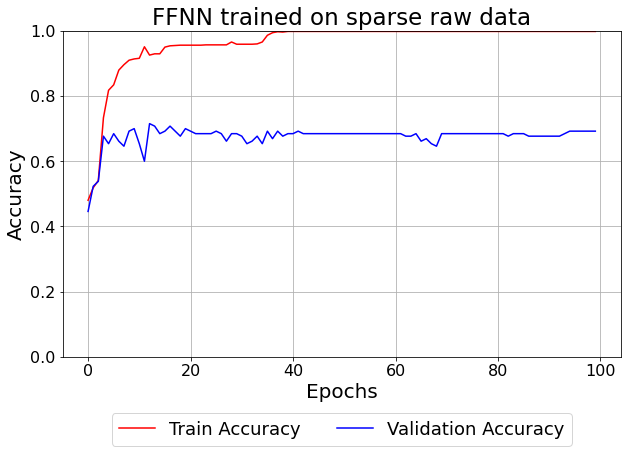

- testing


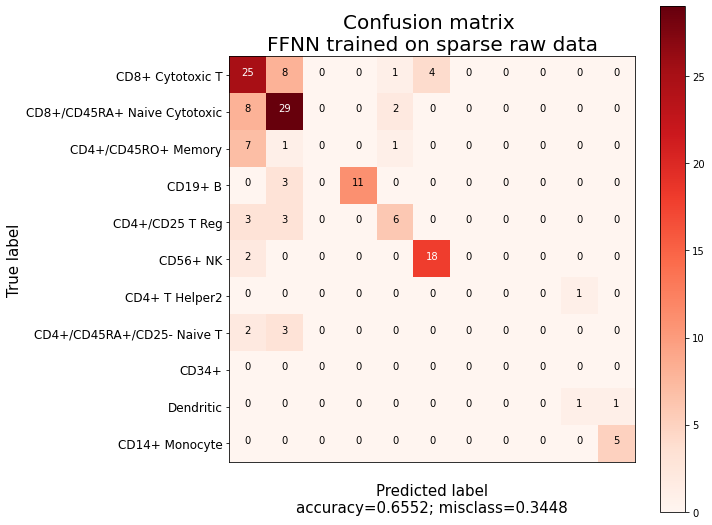

- testing completed
------------------------------ 


---------- pca dataset ----------
10 components
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 24.905735 , Train acc 0.418095, Valid acc 0.500000
	 · Epoch 11 : Train Loss 20.632011 , Train acc 0.606667, Valid acc 0.581818
	 · Epoch 21 : Train Loss 20.384251 , Train acc 0.617143, Valid acc 0.600000
	 · Epoch 31 : Train Loss 20.287998 , Train acc 0.620952, Valid acc 0.600000
	 · Epoch 41 : Train Loss 20.183502 , Train acc 0.632381, Valid acc 0.627273
	 · Epoch 51 : Train Loss 20.120605 , Train acc 0.640000, Valid acc 0.627273
	 · Epoch 61 : Train Loss 20.041454 , Train acc 0.650476, Valid acc 0.636364
	 · Epoch 71 : Train Loss 19.995865 , Train acc 0.655238, Valid acc 0.645455
	 · Epoch 81 : Train Loss 19.956167 , Train acc 0.657143, Valid acc 0.636364
	 · Epoch 91 : Train Loss 19.921003 , Train acc 0.657143, Valid acc 0.636364
- training completed


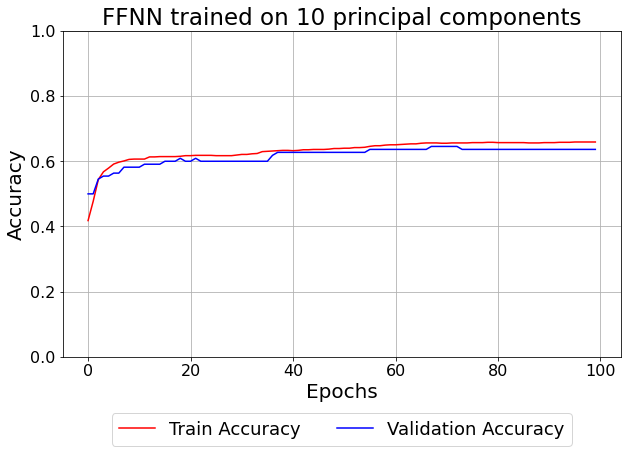

- testing


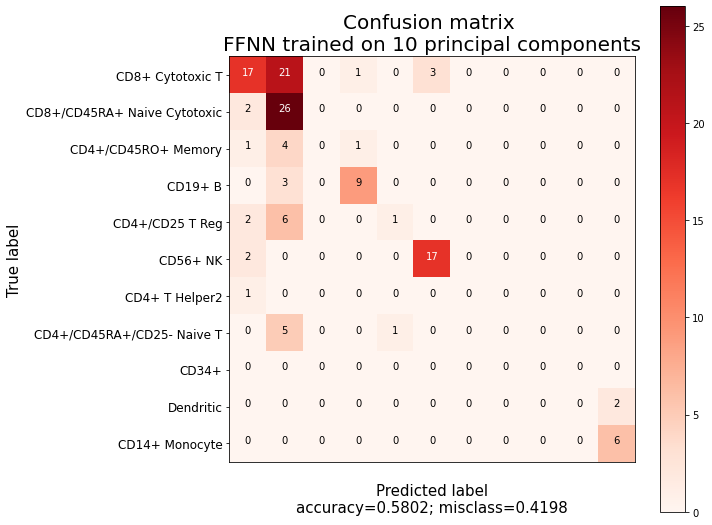

- testing completed
------------------------------ 


---------- pca dataset ----------
25 components
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 23.684559 , Train acc 0.441748, Valid acc 0.435714
	 · Epoch 11 : Train Loss 20.424448 , Train acc 0.585437, Valid acc 0.614286
	 · Epoch 21 : Train Loss 19.959143 , Train acc 0.623301, Valid acc 0.600000
	 · Epoch 31 : Train Loss 19.730915 , Train acc 0.647573, Valid acc 0.621429
	 · Epoch 41 : Train Loss 19.568737 , Train acc 0.662136, Valid acc 0.628571
	 · Epoch 51 : Train Loss 19.439554 , Train acc 0.679612, Valid acc 0.642857
	 · Epoch 61 : Train Loss 19.344824 , Train acc 0.687379, Valid acc 0.642857
	 · Epoch 71 : Train Loss 19.262478 , Train acc 0.695146, Valid acc 0.635714
	 · Epoch 81 : Train Loss 19.186131 , Train acc 0.701942, Valid acc 0.635714
	 · Epoch 91 : Train Loss 19.120968 , Train acc 0.703883, Valid acc 0.628571
- training completed


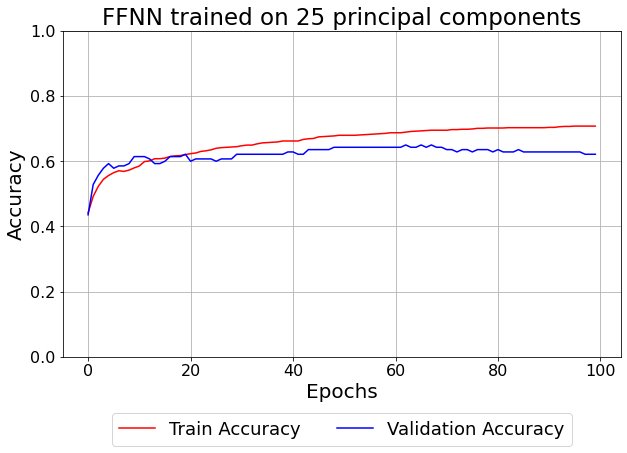

- testing


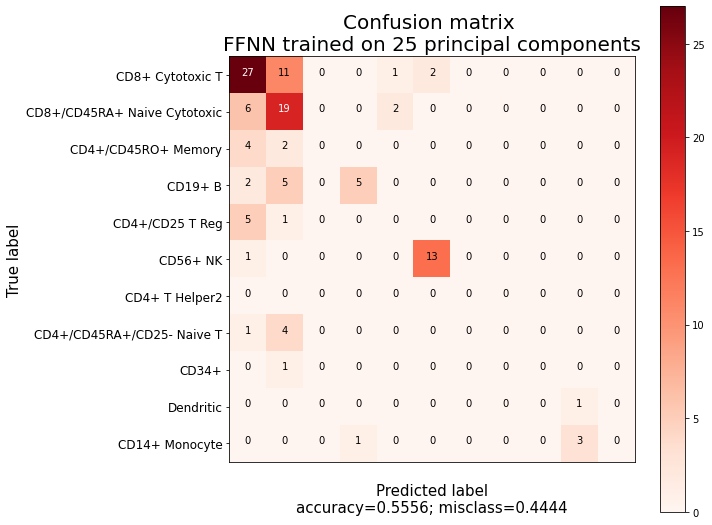

- testing completed
------------------------------ 


---------- pca dataset ----------
50 components
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 23.185699 , Train acc 0.500000, Valid acc 0.407143
	 · Epoch 11 : Train Loss 19.341681 , Train acc 0.662376, Valid acc 0.628571
	 · Epoch 21 : Train Loss 18.891758 , Train acc 0.705941, Valid acc 0.621429
	 · Epoch 31 : Train Loss 18.606516 , Train acc 0.727723, Valid acc 0.592857
	 · Epoch 41 : Train Loss 18.410446 , Train acc 0.742574, Valid acc 0.578571
	 · Epoch 51 : Train Loss 18.232693 , Train acc 0.760396, Valid acc 0.578571
	 · Epoch 61 : Train Loss 18.092163 , Train acc 0.769307, Valid acc 0.571429
	 · Epoch 71 : Train Loss 17.990414 , Train acc 0.777228, Valid acc 0.578571
	 · Epoch 81 : Train Loss 17.898540 , Train acc 0.782178, Valid acc 0.578571
	 · Epoch 91 : Train Loss 17.808437 , Train acc 0.787129, Valid acc 0.600000
- training completed


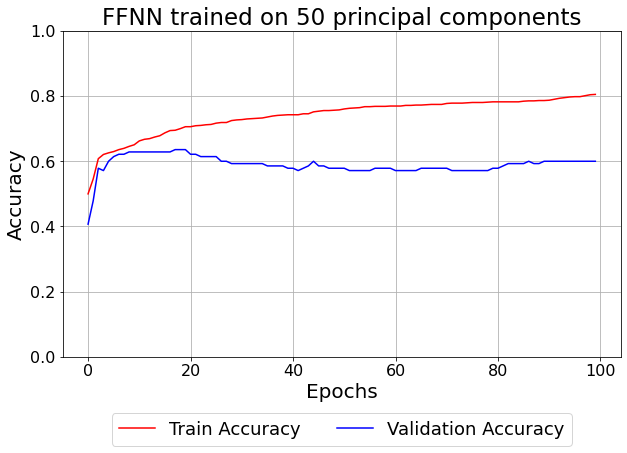

- testing


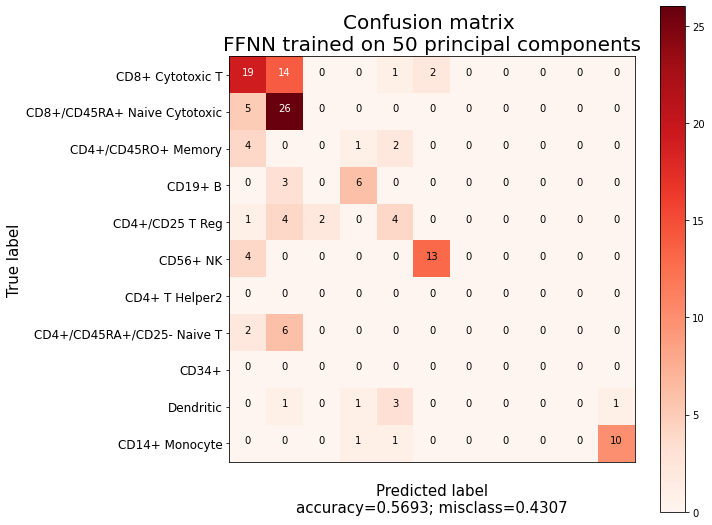

- testing completed
------------------------------ 


---------- pca dataset ----------
100 components
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 24.379591 , Train acc 0.412500, Valid acc 0.458333
	 · Epoch 11 : Train Loss 19.506491 , Train acc 0.713462, Valid acc 0.608333
	 · Epoch 21 : Train Loss 18.796627 , Train acc 0.766346, Valid acc 0.591667
	 · Epoch 31 : Train Loss 18.363573 , Train acc 0.800000, Valid acc 0.591667
	 · Epoch 41 : Train Loss 18.105560 , Train acc 0.817308, Valid acc 0.583333
	 · Epoch 51 : Train Loss 17.928083 , Train acc 0.831731, Valid acc 0.575000
	 · Epoch 61 : Train Loss 17.825890 , Train acc 0.835577, Valid acc 0.575000
	 · Epoch 71 : Train Loss 17.724310 , Train acc 0.842308, Valid acc 0.566667
	 · Epoch 81 : Train Loss 17.664408 , Train acc 0.848077, Valid acc 0.566667
	 · Epoch 91 : Train Loss 17.576366 , Train acc 0.854808, Valid acc 0.550000
- training completed


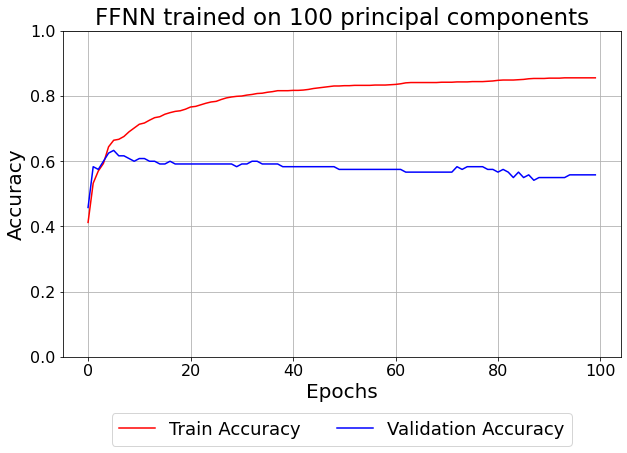

- testing


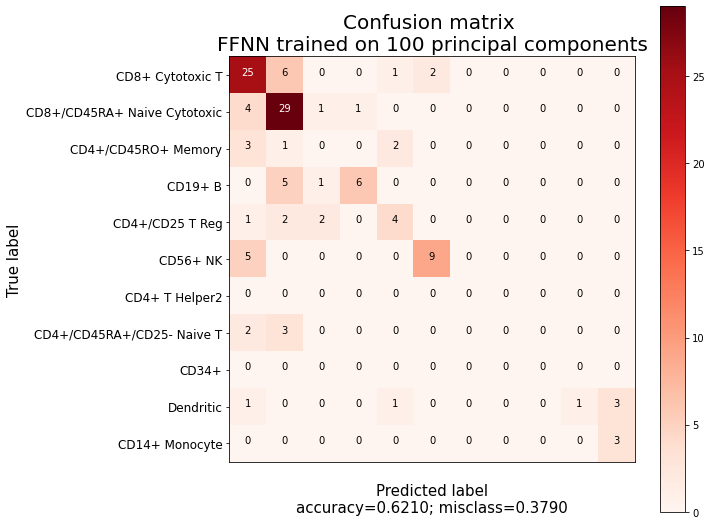

- testing completed
------------------------------ 


---------- scvae dataset ----------
10 latent dimensions
generated with 250 hidden layers
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 4.789441 , Train acc 0.180000, Valid acc 0.050000
	 · Epoch 11 : Train Loss 4.522609 , Train acc 0.480000, Valid acc 0.500000
	 · Epoch 21 : Train Loss 4.366037 , Train acc 0.480000, Valid acc 0.450000
	 · Epoch 31 : Train Loss 4.274100 , Train acc 0.480000, Valid acc 0.500000
	 · Epoch 41 : Train Loss 4.215204 , Train acc 0.495000, Valid acc 0.600000
	 · Epoch 51 : Train Loss 4.175105 , Train acc 0.490000, Valid acc 0.600000
	 · Epoch 61 : Train Loss 4.144885 , Train acc 0.500000, Valid acc 0.600000
	 · Epoch 71 : Train Loss 4.120260 , Train acc 0.510000, Valid acc 0.600000
	 · Epoch 81 : Train Loss 4.098960 , Train acc 0.530000, Valid acc 0.600000
	 · Epoch 91 : Train Loss 4.080403 , Train acc 0.530000, Valid acc 0.500000
- training comp

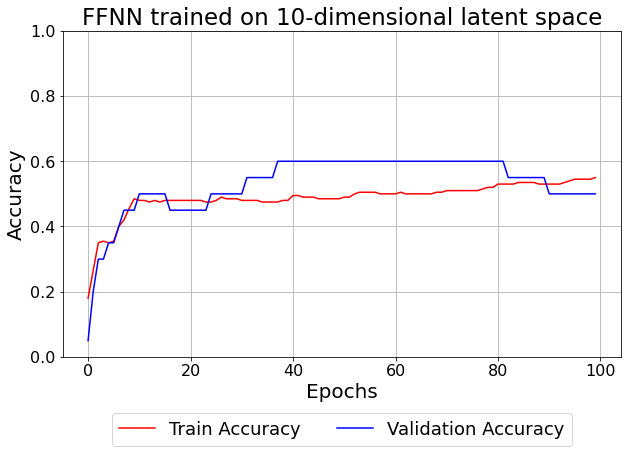

- testing


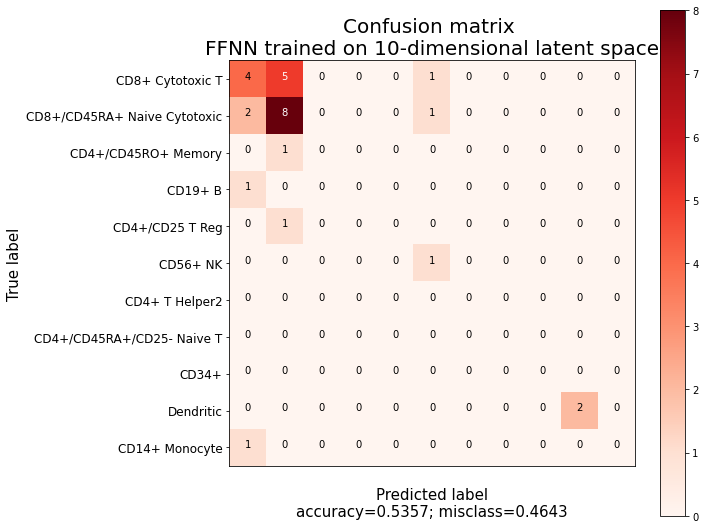

- testing completed
------------------------------ 


---------- scvae dataset ----------
25 latent dimensions
generated with 500 hidden layers
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 4.793374 , Train acc 0.120000, Valid acc 0.150000
	 · Epoch 11 : Train Loss 4.320611 , Train acc 0.490000, Valid acc 0.300000
	 · Epoch 21 : Train Loss 4.072086 , Train acc 0.600000, Valid acc 0.450000
	 · Epoch 31 : Train Loss 3.943421 , Train acc 0.660000, Valid acc 0.500000
	 · Epoch 41 : Train Loss 3.855100 , Train acc 0.700000, Valid acc 0.550000
	 · Epoch 51 : Train Loss 3.802440 , Train acc 0.710000, Valid acc 0.550000
	 · Epoch 61 : Train Loss 3.767335 , Train acc 0.720000, Valid acc 0.600000
	 · Epoch 71 : Train Loss 3.740694 , Train acc 0.725000, Valid acc 0.600000
	 · Epoch 81 : Train Loss 3.718831 , Train acc 0.725000, Valid acc 0.600000
	 · Epoch 91 : Train Loss 3.700183 , Train acc 0.730000, Valid acc 0.600000
- training comp

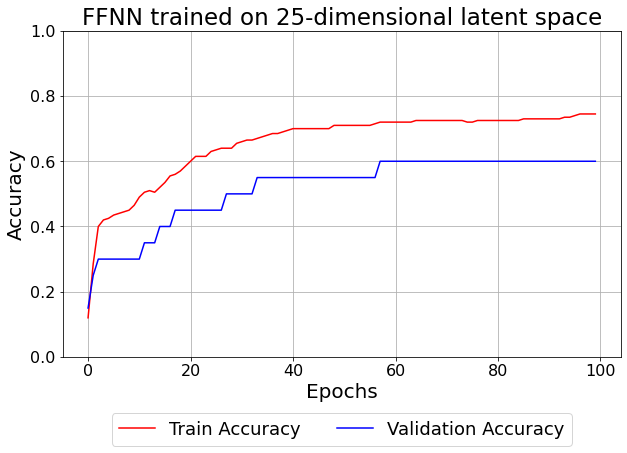

- testing


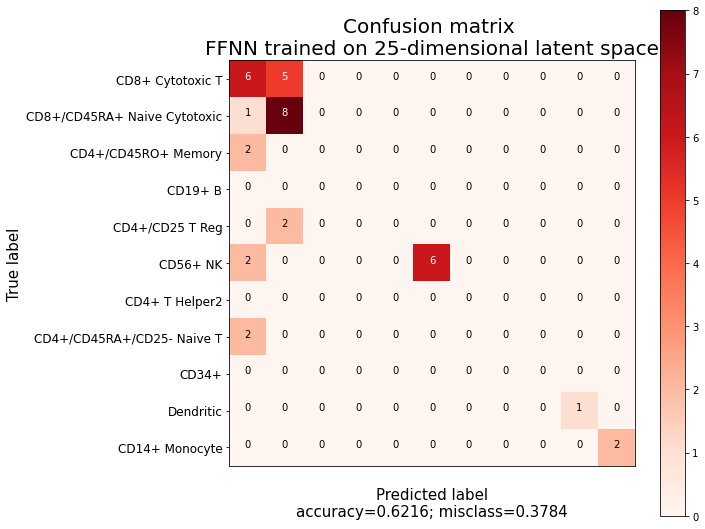

- testing completed
------------------------------ 


---------- scvae dataset ----------
50 latent dimensions
generated with 250 hidden layers
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 4.758060 , Train acc 0.330000, Valid acc 0.400000
	 · Epoch 11 : Train Loss 4.192006 , Train acc 0.515000, Valid acc 0.600000
	 · Epoch 21 : Train Loss 4.049858 , Train acc 0.570000, Valid acc 0.500000
	 · Epoch 31 : Train Loss 3.949929 , Train acc 0.610000, Valid acc 0.600000
	 · Epoch 41 : Train Loss 3.886242 , Train acc 0.625000, Valid acc 0.600000
	 · Epoch 51 : Train Loss 3.832690 , Train acc 0.670000, Valid acc 0.600000
	 · Epoch 61 : Train Loss 3.774503 , Train acc 0.700000, Valid acc 0.800000
	 · Epoch 71 : Train Loss 3.737123 , Train acc 0.730000, Valid acc 0.800000
	 · Epoch 81 : Train Loss 3.707474 , Train acc 0.735000, Valid acc 0.800000
	 · Epoch 91 : Train Loss 3.681355 , Train acc 0.755000, Valid acc 0.800000
- training comp

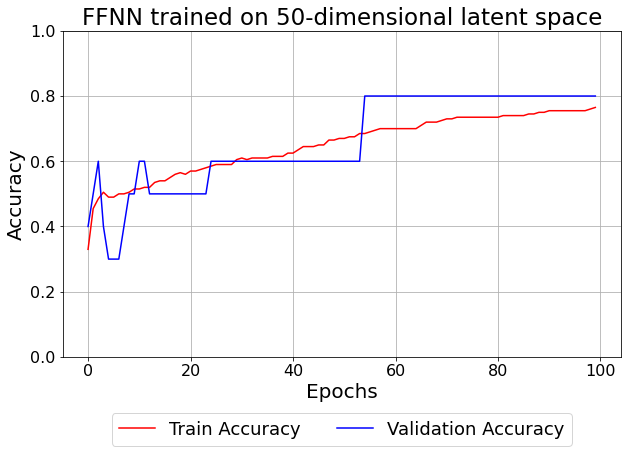

- testing


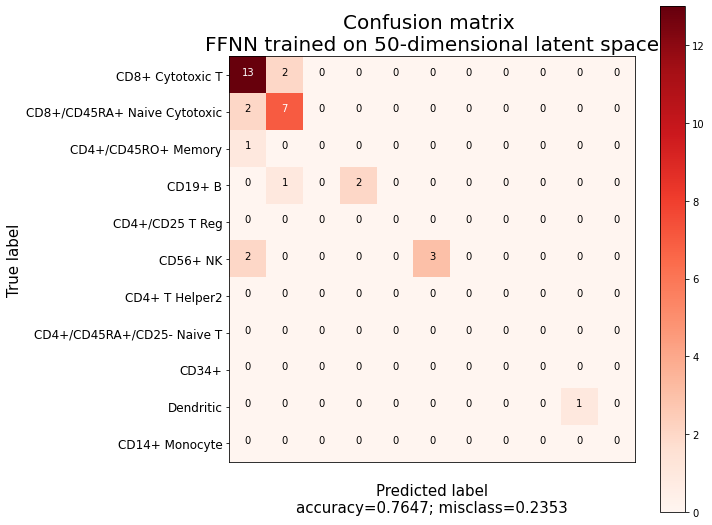

- testing completed
------------------------------ 


---------- scvae dataset ----------
100 latent dimensions
generated with 500 hidden layers
- data set imported
- data set split
- neural network created
- training starts:
	 · Epoch  1 : Train Loss 4.764229 , Train acc 0.335000, Valid acc 0.133333
	 · Epoch 11 : Train Loss 4.048119 , Train acc 0.630000, Valid acc 0.533333
	 · Epoch 21 : Train Loss 3.767839 , Train acc 0.735000, Valid acc 0.633333
	 · Epoch 31 : Train Loss 3.667755 , Train acc 0.755000, Valid acc 0.600000
	 · Epoch 41 : Train Loss 3.601635 , Train acc 0.790000, Valid acc 0.633333
	 · Epoch 51 : Train Loss 3.547108 , Train acc 0.810000, Valid acc 0.633333
	 · Epoch 61 : Train Loss 3.508904 , Train acc 0.825000, Valid acc 0.666667
	 · Epoch 71 : Train Loss 3.479261 , Train acc 0.835000, Valid acc 0.666667
	 · Epoch 81 : Train Loss 3.457589 , Train acc 0.835000, Valid acc 0.633333
	 · Epoch 91 : Train Loss 3.441236 , Train acc 0.840000, Valid acc 0.633333
- training com

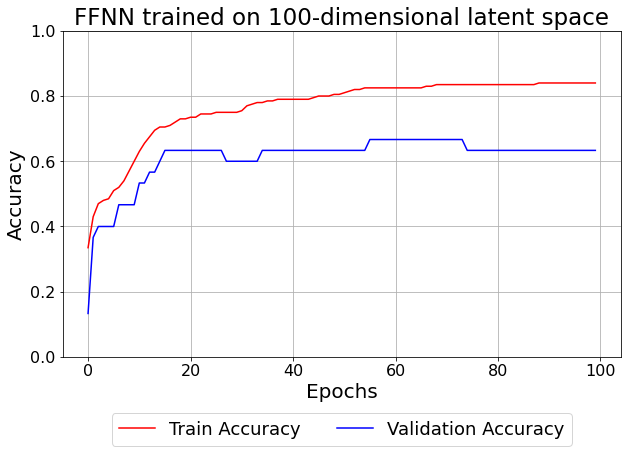

- testing


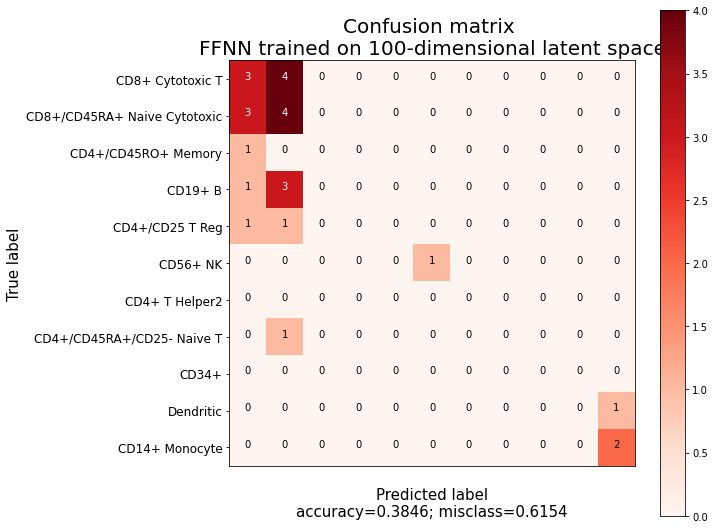

- testing completed
------------------------------ 




In [11]:
# Information to load data

subsets = [1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300]
datasets = ['raw', 'pca', 'pca', 'pca', 'pca', 'scvae', 'scvae', 'scvae', 'scvae']
dimensions = [32738, 10, 25, 50, 100, 10, 25, 50, 100]
hidden_layers = [None, None, None, None, None, 250, 500, 250, 500]
test_acc = [None] * len(datasets)

'''
# Subsets 15000
subsets = [15000, 15000, 15000, 15000]
datasets = ['scvae', 'scvae', 'scvae', 'scvae']
dimensions = [10, 25, 50, 100]
hidden_layers = [250, 500, 250, 500]
test_acc = [None] * len(datasets)
'''

for idx, dataset in enumerate(datasets):
  
  subset = subsets[idx]
  dim = dimensions[idx]
  hidden = hidden_layers[idx]

  print('----------', dataset, 'dataset', '----------')

  # Import data
  if dataset == 'raw':
    df = pd.read_csv(path_raw + 'subset' + str(subset) + '_counts.tsv.gz', compression='gzip', header=None, sep='\t', index_col=0, quotechar='"', error_bad_lines=False)[0:1300]
    classes = pd.read_csv(path_raw + 'subset' + str(subset) + '_celltypes.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False).celltype[0:1300]
    classes_num = classes.map(dict_encoding) 


  elif dataset == 'pca':
    print(dim, 'components')
    df = pd.read_csv(path_pca + 'subset' + str(subset) + '_pca' + str(dim) + '.tsv', header=0, sep='\t', index_col=0)
    classes = pd.read_csv(path_raw + 'subset' + str(subset) + '_celltypes.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False).celltype[0:1300]
    classes_num = classes.map(dict_encoding) 


  else:
    print(dim, 'latent dimensions')
    print('generated with', hidden, 'hidden layers')
    df = pd.read_csv(path_scvae + 'subset' + str(subset) + '_lv' + str(dim) + '_H' + str(hidden) + '.tsv', sep='\t').rename(columns = {'Unnamed: 0': 'barcodes'}, inplace = False)
    celltypes = pd.read_csv(path_raw + 'fullset_celltypes.tsv', sep='\t')[['barcodes', 'celltype']]
    
    classes = pd.merge(celltypes, df, on='barcodes', how='right').celltype
    df = df.drop('barcodes', 1)
    classes_num = classes.map(dict_encoding) 

  print('- data set imported')

  # Split training and test set 
  # Train set
  index = np.random.rand(len(df)) < 0.8
  df_train_set = df[index]
  y_targets_train = classes_num[index]
  # Remaining fraction
  df_rest = df[~index]
  y_targets_rest = classes_num[~index]
  # Validation and test               
  index = np.random.rand(len(df_rest)) < 0.5
  # Validation
  df_val_set = df_rest[~index]
  y_targets_val = y_targets_rest[~index]
  # Test
  df_test_set = df_rest[index]
  y_targets_test = y_targets_rest[index]


  # Create torch objects for each set
  x_train = torch.from_numpy(df_train_set.values.astype('float32'))
  targets_train = torch.from_numpy(y_targets_train.values)
  x_valid = torch.from_numpy(df_val_set.values.astype('float32'))
  targets_valid = torch.from_numpy(y_targets_val.values)
  x_test = torch.from_numpy(df_test_set.values.astype('float32'))
  targets_test = torch.from_numpy(y_targets_test.values)

  print('- data set split')

  # Set NN hyperparameters
  num_features = x_train.shape[1]
  num_hidden_units = 516
  num_classes = 11
  activation_function = torch.nn.ReLU()

  # Create NN
  net = Net(num_features, num_hidden_units, num_classes, activation_function)
  print('- neural network created')

  # Set training hyperparameters
  batch_size = 10
  num_epochs = 100
  learning_rate = 0.0001
  optimizer = optim.Adam(net.parameters(), 
                        lr = learning_rate)
  criterion = nn.CrossEntropyLoss()

  # Define mini batches
  num_samples_train = x_train.shape[0]
  num_batches_train = num_samples_train // batch_size
  num_samples_valid = x_valid.shape[0]
  num_batches_valid = num_samples_valid // batch_size
  get_slice = lambda i, size: range(i * size, (i + 1) * size)

  # Define accuracy and losses
  train_acc, train_loss = [], []
  valid_acc, valid_loss = [], []
  cur_loss = 0
  losses = []


  # Training
  # ------------------------------------------------------------------------------
  print('- training starts:')
  for epoch in range(num_epochs):
    
      # Training
      cur_loss = 0
      net.train()
      for i in range(num_batches_train):
          optimizer.zero_grad()
          slce = get_slice(i, batch_size)
          # Forward pass
          output = net(x_train[slce])
          # Compute loss
          target_batch = targets_train[slce]
          batch_loss = criterion(output, target_batch)
          # Backward pass
          batch_loss.backward()
          optimizer.step()       
          cur_loss += batch_loss   
      losses.append(cur_loss / batch_size)
      net.eval()

      # Evaluate training
      train_preds, train_targs = [], []
      for i in range(num_batches_train):
          slce = get_slice(i, batch_size)
          # Forward pass
          output = net(x_train[slce])
          preds = torch.max(output, 1)[1]  
          train_targs += list(targets_train[slce].numpy())
          train_preds += list(preds.data.numpy())
      
      # Evaluate validation
      val_preds, val_targs = [], []
      for i in range(num_batches_valid):
          slce = get_slice(i, batch_size)
          # Forward pass
          output = net(x_valid[slce])
          preds = torch.max(output, 1)[1]
          val_targs += list(targets_valid[slce].numpy())
          val_preds += list(preds.data.numpy())
          
      # Update accuracies
      train_acc_cur = accuracy_score(train_targs, train_preds)
      valid_acc_cur = accuracy_score(val_targs, val_preds) 
      train_acc.append(train_acc_cur)
      valid_acc.append(valid_acc_cur)
      
      if epoch % 10 == 0:
          print("\t · Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                  epoch+1, losses[-1], train_acc_cur, valid_acc_cur))
  print('- training completed')
  
  # Learning curve figure        
  epoch = np.arange(len(train_acc))
  plt.figure(figsize=(10, 6))
  plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], 
             fontsize=18, loc='lower center', 
             bbox_to_anchor=[0,-0.30,1,1], ncol=2)
  plt.xlabel('Epochs', fontsize=20), plt.ylabel('Accuracy',fontsize=20)
  plt.tick_params(axis='both', labelsize=16)
  plt.ylim(0, 1)
  if dataset == 'raw':
    title = 'FFNN trained on sparse raw data'
    filename = 'raw'
  elif dataset == 'pca':
    title = 'FFNN trained on ' + str(dim) + ' principal components'
    filename = 'pca' + str(dim)
  else:
    title = 'FFNN trained on '  + str(dim) + '-dimensional latent space'
    filename = 'scvae' + str(dim) + '_H' + str(hidden)
  plt.title(title, fontsize=23)
  #plt.text(x=30, y=0.9, s="source subset %s samples" %subset, fontsize=15)
  plt.grid()
  plt.savefig(path_results + 'learning_curve_subset' + str(subset) + '_' + filename + '.png',
              dpi=300, bbox_inches='tight')
  plt.show()


  

  # Testing
  # ------------------------------------------------------------------------------
  print('- testing')
  # Forward pass
  output = net(x_test)

  # Predict classes
  pred_test = torch.max(output, 1)[1]

  # Confussion matrix
  conf_matrix = confusion_matrix(np.vectorize(dict_decoding.get)(targets_test), 
                                                  np.vectorize(dict_decoding.get)(pred_test), 
                                                  labels=list(dict_decoding.values()))
  
  test_acc[idx] = np.round(np.trace(conf_matrix) / float(np.sum(conf_matrix)), 3)

  plot_confusion_matrix(conf_matrix,
                        list(dict_decoding.values()),
                        title = 'Confusion matrix \n' + title, 
                        cmap=plt.cm.Reds,
                        normalize = False)
   
  plt.savefig(path_results + 'confusion_matrix_subset' + str(subset) + '_' + filename + '.png',
              dpi=300, bbox_inches='tight') 
  plt.show()
  print('- testing completed')
  print('------------------------------ \n\n')



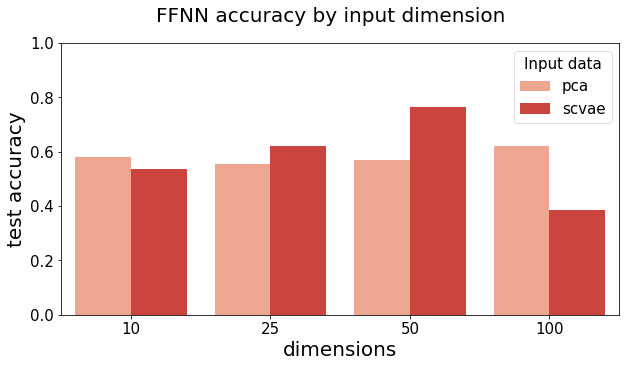

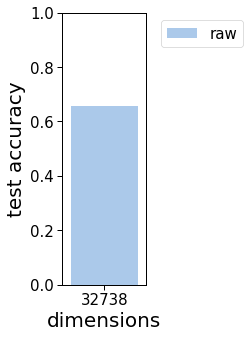

In [12]:
# Plot test accuracies
accuracies = pd.DataFrame({
    'subset': subsets,
    'method': datasets,
    'dimension': dimensions,
    'hidden_layers': hidden_layers,
    'test_accuracy': test_acc
})

fig, ax = plt.subplots(figsize=(10,5))
sns.set_context('paper')
sns.barplot(x='dimension', 
            y='test_accuracy',
            hue='method',
            data=accuracies[accuracies['subset']==1300][accuracies['method']!='raw'],
            palette='Reds')
ax.set(xlabel='dimensions', ylabel='test accuracy')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
fig.suptitle('FFNN accuracy by input dimension', fontsize=20)
ax.legend(fontsize=15, title='Input data', title_fontsize=15)
ax.tick_params(labelsize=15, axis='both')
plt.ylim(0,1)
plt.savefig(path_results + 'test_accuracies_plot_subset1300_pca_scvae.png', dpi=300)


fig, ax = plt.subplots(figsize=(1.5,5))
sns.barplot(x='dimension', 
            y='test_accuracy',
            hue='method', 
            data=accuracies[accuracies['method']=='raw'], 
            palette='pastel')
ax.set(xlabel='dimensions', ylabel='test accuracy')
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(labelsize=15, axis='both')
plt.ylim(0,1)
plt.legend(fontsize=15, bbox_to_anchor=[2.25,1])
plt.savefig(path_results + 'test_accuracies_plot_subset1300_raw.png', dpi=300)

# Save test accuracies 
# accuracies.to_csv(path_results + "test_accuracies.csv", index=False)